In [12]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [13]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())
print()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])



In [14]:
print(boston_dataset.DESCR)
#boston_dataset.target
#boston_dataset.feature_names

#boston_dataset.filename
#boston_dataset.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
boston = pd.DataFrame( boston_dataset.data , columns=boston_dataset.feature_names)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
#We create a new column of target values and add medv to the dataframe.
#The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables
boston['MEDV'] = boston_dataset.target

In [17]:

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

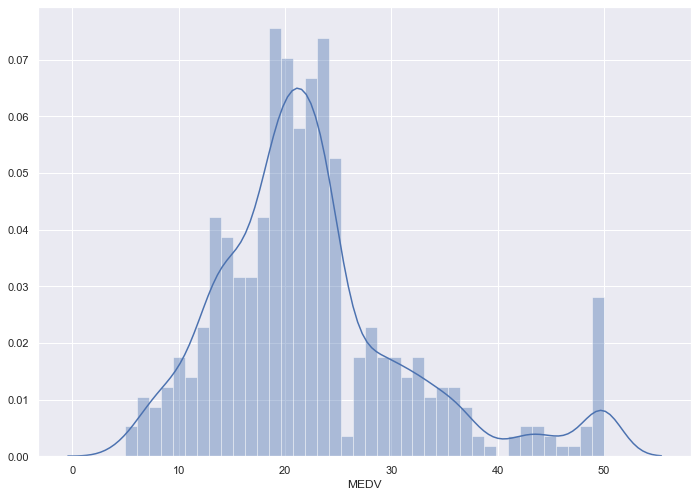

In [18]:
#there are no missing values in this dataset as shown above.
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.distplot(boston['MEDV'], bins=40)
plt.show()

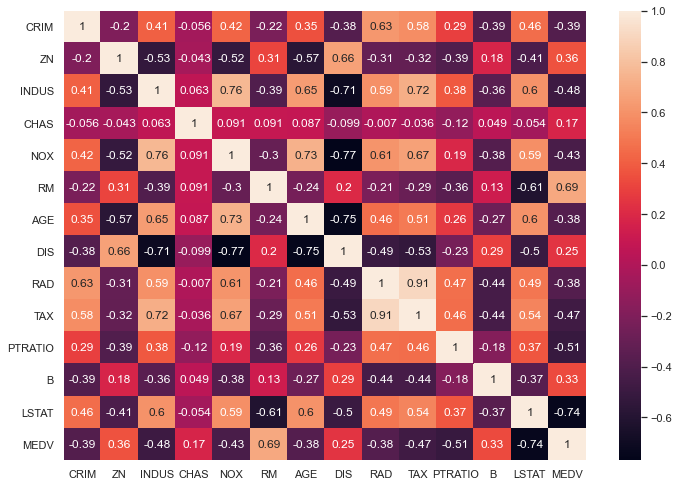

In [19]:
# The correlation matrix can be formed by using the corr function from the pandas dataframe library. We use the heatmap function from the seaborn library to plot the correlation matrix.
correlation_matrix = boston.corr().round(3)
# annot =True (print the values inside the square)
sns.heatmap(data=correlation_matrix, annot=True)

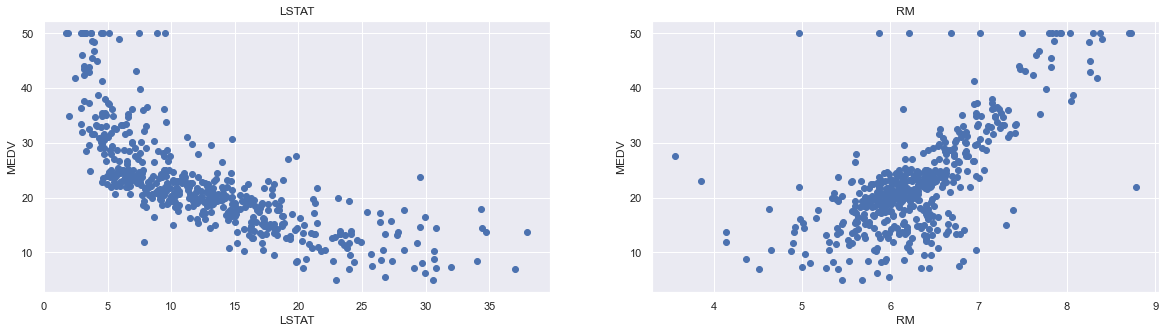

In [24]:
#correlation matrix we can see that RM has a strong positive correlation with MEDV (0.69) where as LSTAT has a high negative correlation with MEDV(-0.74).
#therefore  we take lstat and rm as features 
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, 2 , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

C:\Users\diya achaya\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


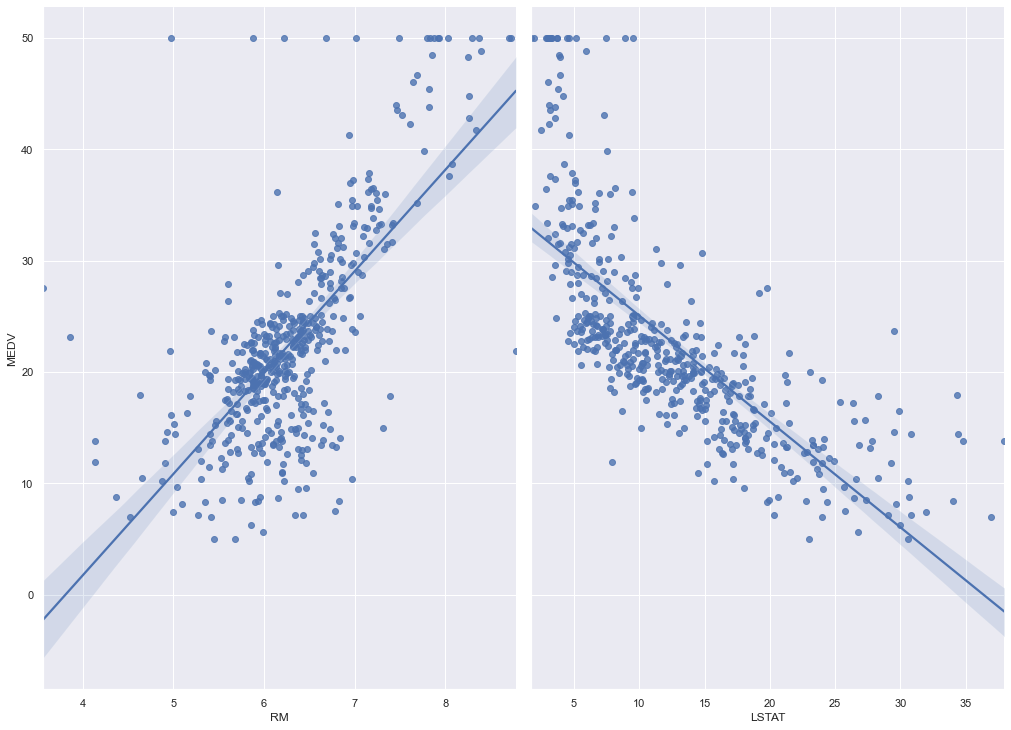

In [23]:
sns.pairplot(boston ,x_vars=['RM','LSTAT'], y_vars='MEDV', size=10, aspect=0.7, kind='reg')

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [ ]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("____________________________________________")
print("|The model performance for this training set ")
print("|____________________________________________")
print("|RMSE is ",rmse,)
print('|R2 score is ',r2)
print("|____________________________________________")
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("____________________________________________")
print("|The model performance for this  testing set")
print("|____________________________________________")
print('|RMSE is',(rmse))
print('|R2 score is ',(r2))
print("|____________________________________________")

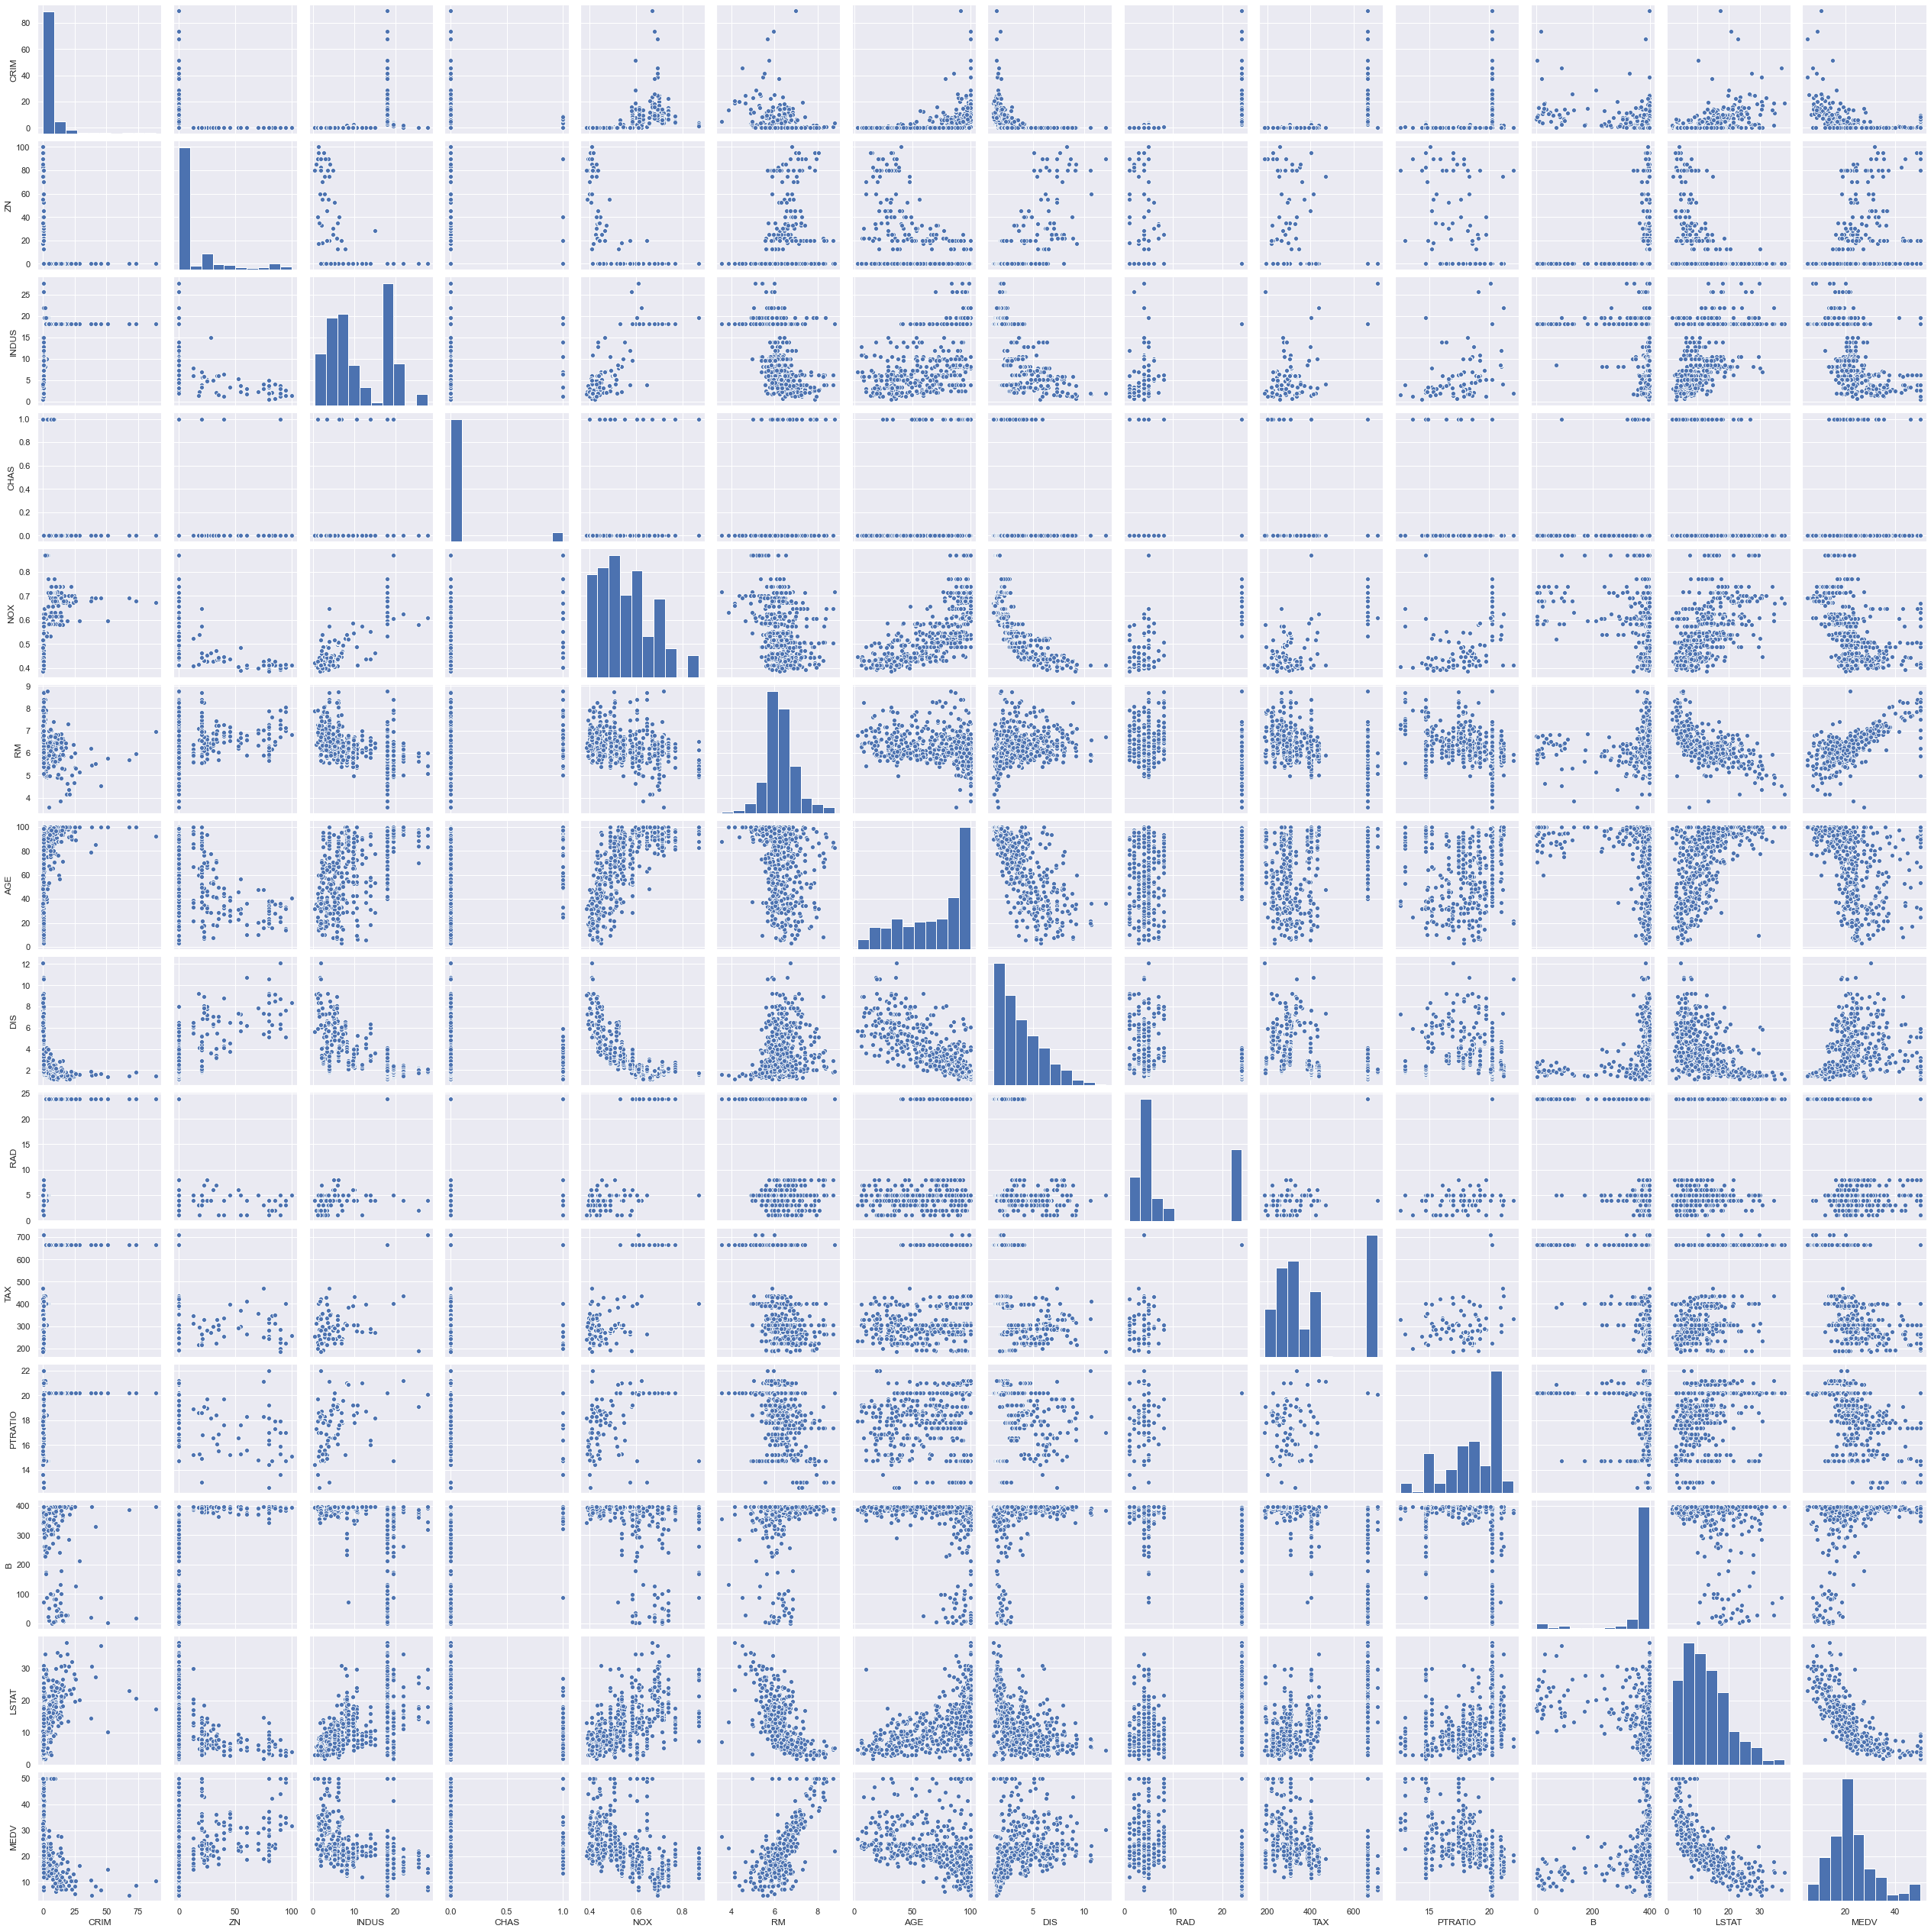

In [29]:
#just to show the plots of various features
sns.pairplot(boston, vars = boston.iloc[:])